In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
Bowl = cv2.imread('/content/drive/MyDrive/ITSP/Bowl')

In [ ]:
import glob
images = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ITSP/Bowl/*.jpg")]

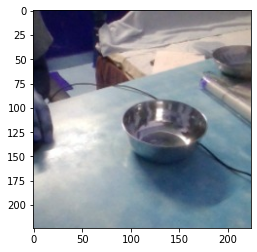

In [ ]:
plt.imshow(images[0])

In [ ]:
print(images[0].shape)

(224, 224, 3)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


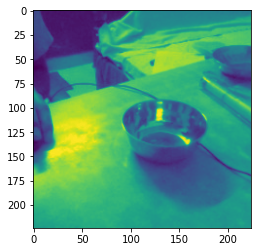

In [ ]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY))

In [ ]:
X_train_bowl=images
X_train_bowl=np.array(X_train_bowl)

In [ ]:
Y_train_bowl=np.zeros(((X_train_bowl.shape[0]),4))

In [ ]:
Y_train_bowl[0]

array([0., 0., 0., 0.])

In [ ]:
Y_train_bowl[:,0].shape

(138,)

In [ ]:

Y_train_bowl[:,0]=1

In [ ]:
import glob
images = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ITSP/Glass/*.jpg")]
X_train_glass=images
X_train_glass=np.array(X_train_glass)
Y_train_glass=np.zeros(((X_train_glass.shape[0]),4))
Y_train_glass[:,1]=1

In [ ]:
import glob
images = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ITSP/Plate/*.jpg")]
X_train_plate=images
X_train_plate=np.array(X_train_plate)
Y_train_plate=np.zeros(((X_train_plate.shape[0]),4))
Y_train_plate[:,2]=1

In [ ]:
import glob
images = [cv2.imread(file) for file in glob.glob("/content/drive/MyDrive/ITSP/Other/*.jpg")]
X_train_other=images
X_train_other=np.array(X_train_other)
Y_train_other=np.zeros(((X_train_other.shape[0]),4))
Y_train_other[:,3]=1

In [ ]:
X_train=np.concatenate((X_train_bowl,X_train_glass),axis=0)

In [ ]:
X_train=np.concatenate((X_train,X_train_plate),axis=0)

In [ ]:
X_train=np.concatenate((X_train,X_train_other),axis=0)

In [ ]:
Y_train=np.concatenate((Y_train_bowl,Y_train_glass),axis=0)

In [ ]:
Y_train=np.concatenate((Y_train,Y_train_plate),axis=0)

In [ ]:
Y_train=np.concatenate((Y_train,Y_train_other),axis=0)

In [ ]:
print(X_train.shape,Y_train.shape)

(631, 224, 224, 3) (631, 4)


In [ ]:
imgData=np.zeros((631,50,50,3))
for i in range(631):
  imgData[i] = cv2.resize(X_train[0], (50,50))

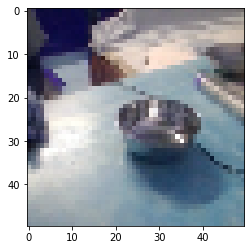

In [ ]:
plt.imshow(imgData[0]/255)
X_train=imgData

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report

model = Sequential()

model.add((Conv2D(120,(5,5),strides=(1,1),input_shape=(50, 50,3) ,padding = 'same' ,activation='relu')))
model.add((Conv2D(120, (5,5),padding="same",activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add((Conv2D(60, (5,5),padding="same", activation='relu')))
model.add((Conv2D(60, (5,5), padding="same", activation='relu')))
model.add(Dropout(0.5))

model.add((Conv2D(60, (5,5),padding="same", activation='relu')))
model.add((Conv2D(60, (5,5), padding="same", activation='relu')))
model.add(Dropout(0.5))

model.add((Conv2D(60, (3,3),padding="same", activation='relu')))
model.add((Conv2D(60, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add((Conv2D(60, (3,3),padding="same", activation='relu')))
model.add((Conv2D(60, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add((Conv2D(60, (3,3),padding="same", activation='relu')))
model.add((Conv2D(60, (3,3), padding="same", activation='relu')))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))



model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 50, 50, 120)       9120      
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 50, 50, 120)       360120    
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 25, 25, 120)       0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 25, 25, 120)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 25, 25, 60)        180060    
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 25, 25, 60)        90060     
_________________________________________________________________
dropout_36 (Dropout)         (None, 25, 25, 60)       

In [ ]:
model=tf.keras.models.load_model('/content/finalModel.h5')

In [ ]:
model.compile(optimizer=Adam(lr=2e-6),loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, Y_train,validation_split=0.13,shuffle=True,
                        
                    
                        epochs=40,
                        batch_size=32)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/40
18/18 [==============================] - 99s 5s/step - loss: 1.7846 - accuracy: 0.1825 - val_loss: 1.3888 - val_accuracy: 0.0000e+00
Epoch 2/40
18/18 [==============================] - 98s 5s/step - loss: 1.6890 - accuracy: 0.2007 - val_loss: 1.3886 - val_accuracy: 0.0000e+00
Epoch 3/40
18/18 [==============================] - 98s 5s/step - loss: 1.6441 - accuracy: 0.2080 - val_loss: 1.3902 - val_accuracy: 0.0000e+00
Epoch 4/40
18/18 [==============================] - 96s 5s/step - loss: 1.6252 - accuracy: 0.2080 - val_loss: 1.3894 - val_accuracy: 0.0000e+00
Epoch 5/40
18/18 [==============================] - 96s 5s/step - loss: 1.6082 - accuracy: 0.2026 - val_loss: 1.3874 - val_accuracy: 0.6265
Epoch 6/40
18/18 [==============================] - 95s 5s/step - loss: 1.5352 - accuracy: 0.2299 - val_loss: 1.3857 - val_accuracy: 0.6265
Epoch 7/40
18/18 [==============================] - 95s 5s/step - loss: 1.5110 - accuracy: 0.2299 - val_loss: 1.3862 - val_accuracy: 0.6265
Epoc

In [ ]:
model.save('/content/drive/MyDrive/finalModel')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/finalModel/assets
